## Cross Validation:
is a way we can further split up our data to find the best model, or the hyper parameters for a model.
_______________

## K-Fold Cross Validation
###  main idea: split your data into k (a positive integer) folds.
- treat each fold a s a test split and average model's performace across all folds
- **Pros:**
    - works for any tupe of model
    - important for datasets w/ small n
- **Cons:**
    - computationally expensive, especially as k increases

**leave one out cross valiation: k = n-1**
_________________

### Dataset w/ k=3:
- k1
    - Train: A, B
    - Test: C
    - Score: 0.68
- k2
    - Train: A, C
    - Test: B
    -Score: 0.75
- k3
    - Train: C, B
    - Test: A
    - Score: 0.72
    
    
|K |Train |	Test |	Score |
|---|---|---|---|
|1 | A, B | C | 0.68 |
|2 | A, C |	B |	0.75 |
|3 | C, B |	A |	0.72 |


Avg Test Score = (0.68+0.75+ 0.72) / 3 = 71.67%

- **there is no correct value for 'k' but most common is 5**
- **score is on accuracy unless otherwise specified**



## Grid Search¶
- helps you determine what 'k' to use
- compares hyperparameters

## Setup

We'll use the mpg dataset and predict whether a car has automatic or manual transmission.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydataset

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
mpg = pydataset.data('mpg')

In [4]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [2]:
#assigne just the values of auto or manual 
mpg.trans = np.where(mpg.trans.str.startswith('auto'), 'auto', 'manual')

In [3]:
X, y = mpg[['displ', 'cyl', 'cty', 'hwy']], mpg.trans

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## `cross_val_score`

In [6]:
#create the model
clf = DecisionTreeClassifier(max_depth=4)
#cv = number of folds
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.6114285714285714

<AxesSubplot:xlabel='depth'>

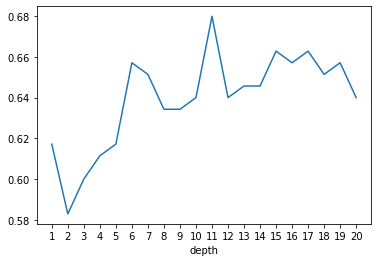

In [7]:
#compare hyperparameters
results = []
for depth in range(1, 21):
    clf = DecisionTreeClassifier(max_depth=depth)
    result = {'depth': depth}
    result['score'] = cross_val_score(clf, X_train, y_train, cv=5).mean()
    results.append(result)
#turn results into a DF and visualize        
pd.DataFrame(results).set_index('depth').score.plot(xticks=range(1, 21))
#this shows you that depth of 6-7 is best

## Grid Search

**KNN**

In [ ]:
#create model
clf = KNeighborsClassifier()
#specify the parameters (all hyperparams in n neighbors, range 1-20)
params = {'n_neighbors': range(1, 21)}
#create a grid search
grid = GridSearchCV(clf, params, cv=5)

#fit the model
grid.fit(X_train, y_train)

In [ ]:
#np array of all mean test scores
grid.cv_results_['mean_test_score']

In [ ]:
grid.cv_results_['params']
# n-1, score 0.594, n-2, score 0.628, etc

In [ ]:
#this will tell you n-12 has best score with 0.65
grid.best_score_, grid.best_params_

In [ ]:
#this only shows best n
grid.best_estimator_

In [ ]:
**Decision Tree Model**

In [ ]:

#create model
clf = DecisionTreeClassifier()

#identify parameters
params = {'max_depth': range(1, 21), 'min_samples_leaf': range(1, 11)}

#create grid search
grid = GridSearchCV(clf, params, cv=10)

#fit model
grid.fit(X_train, y_train)

In [ ]:

#combine results with params and turn it into Pandas DF
for params, score in zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']):
    params['score'] = score

In [ ]:
#create DF with results of cross validation scores
pd.DataFrame(grid.cv_results_['params']).sort_values(by='score').tail(10)

#best model is max_depth- 14, min_leaf-1

## Custom Scoring

In [ ]:
from sklearn.metrics import make_scorer, precision_score

#create the model
clf = KNeighborsClassifier(n_neighbors=5)

#change the score to precision
cross_val_score(
    clf, 
    X_train, 
    y_train, 
    scoring=make_scorer(precision_score, pos_label='manual'),
    cv=10
)